%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


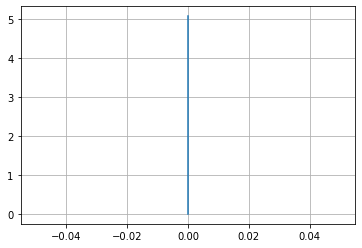

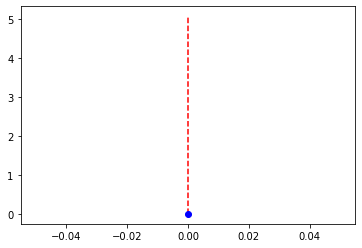

In [4]:
%pylab inline
# Perfect sensor
def sense(x):
    return x
def simulate(Δt, x, u):
    x += Δt * u
    return x
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    u= Kp*(p_d - y)+math.exp(-Ki*t)*((p_d*t)-(0.5*y*y))
    return u
tf = 5.
Δt = 0.05    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([0., 0.])
x_log = [copy(x)]
Kp = 1
Ki = 1
p_d = array([0.,5.])
for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)
grid()
plot(x_log[:,0], x_log[:,1])

import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())